## Statistical Analysis

## 1.Chi-squared test

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

In [3]:
# load the dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
# contigency table
contingency_table = pd.crosstab(df['sex'], df['survived'])
contingency_table

survived,0,1
sex,,
female,81,233
male,468,109


In [6]:
#perform chi-square test
stats.chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=np.float64(260.71702016732104), pvalue=np.float64(1.1973570627755645e-58), dof=1, expected_freq=array([[193.47474747, 120.52525253],
       [355.52525253, 221.47474747]]))

---
## 2.Normal Distribution Test

In [7]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='age', ylabel='Count'>

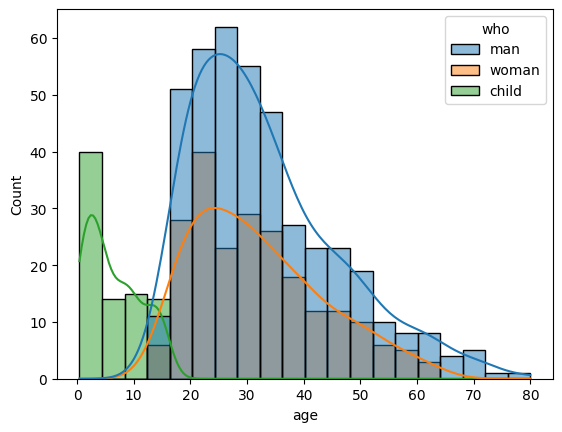

In [12]:
#graphical method
sns.histplot(data=df,x='age', hue='who', kde=True)

## shapiro wilk test on normal distribution Guassion Distribution
## Null Hypothesis: The data is normally distributed
## Alternative Hypothesis

In [14]:
# shapiro wilk test
statistic,p =stats.shapiro(df['age'])
# print the result using if else
if p>0.05:
    print("Fail to reject the null hypothesis, data is normally distributed")
else:
    print("Reject the null hypothesis, data is not normally distributed")

Reject the null hypothesis, data is not normally distributed


<Axes: xlabel='fare', ylabel='Count'>

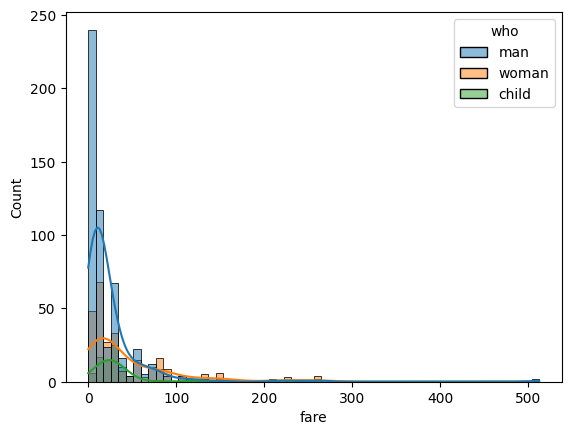

In [16]:
#graphical method
sns.histplot(data=df,x='fare', hue='who', kde=True)

In [15]:
# shapiro wilk test
statistic,p =stats.shapiro(df['fare'])
# print the result using if else
if p>0.05:
    print("Fail to reject the null hypothesis, data is normally distributed")
else:
    print("Reject the null hypothesis, data is not normally distributed")

Reject the null hypothesis, data is not normally distributed


---

## 3. t-Test

1. One_sample t-Test

In [20]:
import scipy.stats as stats
#sample data
data = [1,2,3,4,5]
#known population mean
mu = 3
#perform one sample t-test
t_statistic, p_value = stats.ttest_1samp(data, mu)
#print the result
print("t-statistic:", t_statistic)
print("p-value:", p_value)
#print the result using if else
if p_value > 0.05:
    print("Fail to reject the null hypothesis, sample mean is equal to population mean")
else:
    print("Reject the null hypothesis, sample mean is not equal to population mean")

t-statistic: 0.0
p-value: 1.0
Fail to reject the null hypothesis, sample mean is equal to population mean


2. Two_sample t-test

In [21]:
import scipy.stats as stats

# sample data
group1 = [2.3, 3.4, 4.5, 2.3, 3.4]
group2 = [1.2, 2.2, 3.2, 2.2, 2.3]

# perform independent two-sample t-test
t_stat, p = stats.ttest_ind(group1, group2, equal_var=True)

print("t-statistic:", t_stat)
print("p-value:", p)

if p > 0.05:
    print(f'p-value: {p}, group1 mean is equal to group2 mean (fail to reject H0)')
else:
    print(f'p-value: {p}, group1 mean is not equal to group2 mean (reject H0)')

t-statistic: 1.8482055087756457
p-value: 0.10175647371829195
p-value: 0.10175647371829195, group1 mean is equal to group2 mean (fail to reject H0)


3. Paired_Sample t-test

In [22]:
import scipy.stats as stats

# sample data
before = [2, 3, 4, 5, 6]
after = [3, 4, 5, 6, 7]

# perform paired sample t-test
t_stat, p_val = stats.ttest_rel(before, after)

print("t-statistic:", t_stat)
print("p-value:", p_val)

# print the results using if else conditions
if p_val > 0.05:
    print(f'p-value: {p_val}, before mean is equal to after mean (fail to reject H0)')
else:
    print(f'p-value: {p_val}, before mean is not equal to after mean (reject H0)')

t-statistic: -inf
p-value: 0.0
p-value: 0.0, before mean is not equal to after mean (reject H0)


c:\Users\Abdullah\anaconda3\envs\python_eda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:423: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  return hypotest_fun_in(*args, **kwds)


---
## Test for Homogeneity

## 1. Levene's Test

In [24]:
import scipy.stats as stats

# Sample data
group1 = [2.3, 3.4, 4.5, 2.3, 3.4]
group2 = [1.2, 2.2, 3.2, 2.2, 2.3]

# Perform Levene's Test
w_stat, p_val = stats.levene(group1, group2)

print("w-statistic:", w_stat)
print("p-value:", p_val)

# print the results based on if else conditions
if p_val > 0.05:
    print(f'p-value: {p_val}, Variances are equal (fail to reject H0)')
else:
    print(f'p-value: {p_val}, Variances are not equal (reject H0)')

w-statistic: 0.44651162790697696
p-value: 0.5228039334796065
p-value: 0.5228039334796065, Variances are equal (fail to reject H0)


## 2.Bartlett Test

In [25]:
import scipy.stats as stats

# Sample data
group1 = [2.3, 3.4, 4.5, 2.3, 3.4]
group2 = [1.2, 2.2, 3.2, 2.2, 2.3]

# Perform Bartlett's Test
t_stat, p_val = stats.bartlett(group1, group2)

print("t-statistic:", t_stat)
print("p-value:", p_val)

# print the results using if else conditions
if p_val > 0.05:
    print(f'p-value: {p_val}, Variances are equal (fail to reject H0)')
else:
    print(f'p-value: {p_val}, Variances are not equal (reject H0)')

t-statistic: 0.24050679805097827
p-value: 0.6238403179343277
p-value: 0.6238403179343277, Variances are equal (fail to reject H0)


--- 
## ANOVA
Analysis of Variance

## 1. One Way Anova

In [26]:
import scipy.stats as stats

# Sample data

a = [2.3, 3.4, 4.5, 2.3, 3.4]
b = [11.2, 12.2, 13.2, 12.2, 12.3]
c = [22.3, 23.4, 24.5, 22.3, 23.4]

# perform one-way ANOVA
f_stat, p_val = stats.f_oneway(a, b, c)

# print the results base on if else conditions
if p_val > 0.05:
    print(f'p-value: {p_val}, Means are equal (fail to reject H0)')
else:
    print(f'p-value: {p_val}, Means are not equal (reject H0)')

p-value: 4.279979561060641e-13, Means are not equal (reject H0)
